### quest5 
- 분석 대상 : 
성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 데이터셋 만들기
- option : 연령이 Q1~Q3 범위 속한 인원 수 찾기

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [18]:
df_ROS.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [45]:
# 분석 대상 : 성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
df_ROS_forpatient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부','연령','직업', '혈액형','재발여부']]
df_ROS_forpatient.describe()

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569,0.119852
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629,0.324874
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000,0.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000,0.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


In [22]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [46]:
df_ROS_forpatient.describe(include=object) # 범주형

,직업,혈액형
count,1479,1894
unique,17,4
top,사무직,RH+A
freq,449,688


In [47]:
df_ROS_forpatient.describe() # 연속형

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569,0.119852
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629,0.324874
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000,0.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000,0.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


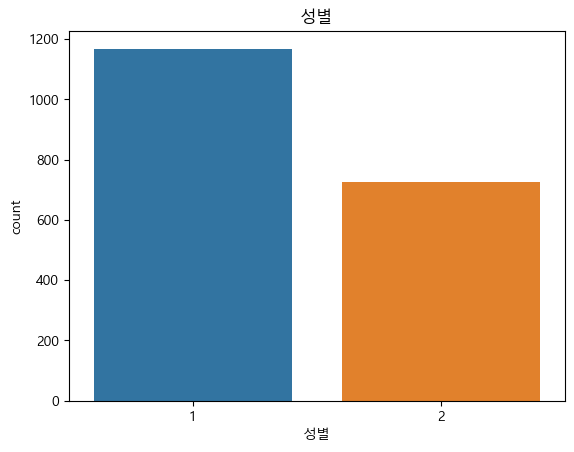

In [21]:
## 단일 변수 chart 각각 작성
# 성별 chart
sns.countplot(data=df_ROS_forpatient, x='성별')
plt.title("성별")
plt.show()

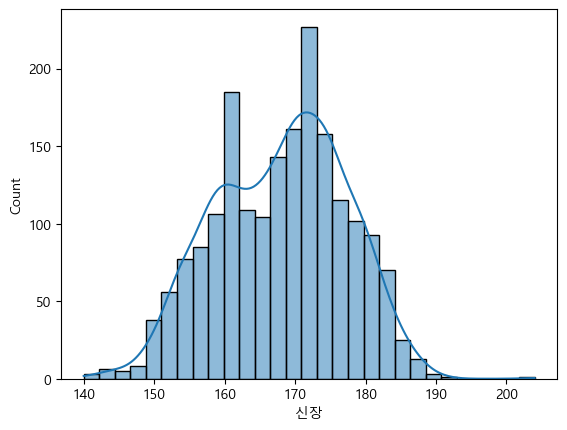

In [25]:
# 신장 chart
sns.histplot(data=df_ROS_forpatient, x='신장', kde='True') 
plt.show()

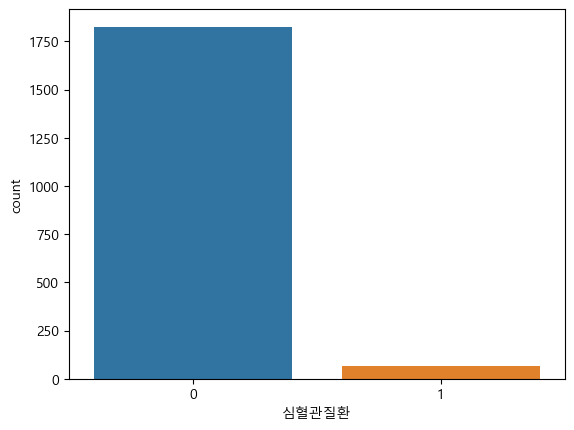

In [76]:
# 심혈관질환 chart
sns.countplot(data=df_ROS_forpatient, x='심혈관질환')
plt.show()

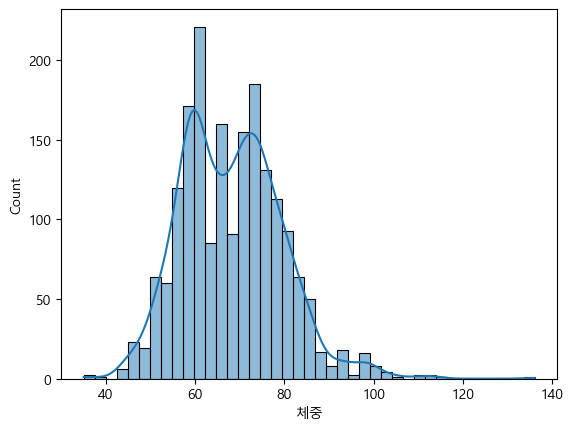

In [26]:
# 질환 chart
sns.histplot(data=df_ROS_forpatient, x='체중', kde='True') 
plt.show()

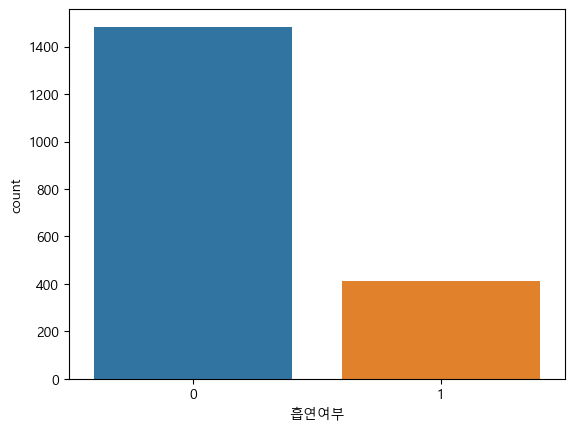

In [77]:
# 흡연여부 chart
sns.countplot(data=df_ROS_forpatient, x='흡연여부')
plt.show()

<Axes: xlabel='연령'>

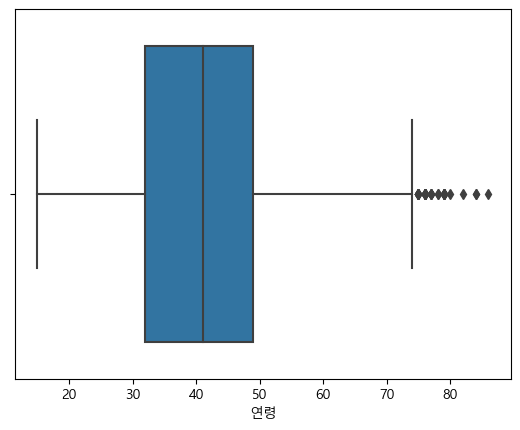

In [30]:
# 연령 chart
sns.boxplot(data=df_ROS_forpatient, x='연령') # 사분위 표시, 중앙값

In [32]:
# 직업 chart
order_list = df_ROS_forpatient['직업'].value_counts().index.to_list()
order_list

['사무직',
 '자영업',
 '무직',
 '학생',
 '주부',
 '군인',
 '공무원',
 '운수업',
 '노동직',
 '농업',
 '의료직',
 '사업가',
 '교사',
 '특수전문직',
 '건설업',
 '운동선수',
 '예술가']

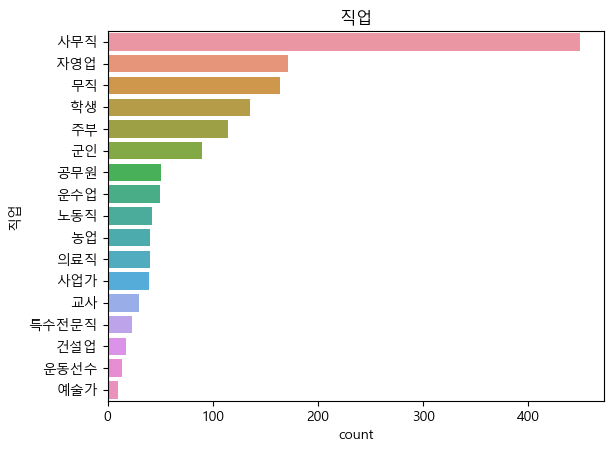

In [75]:
sns.countplot(data=df_ROS_forpatient, y='직업', order=order_list)
plt.title("직업")
plt.show()

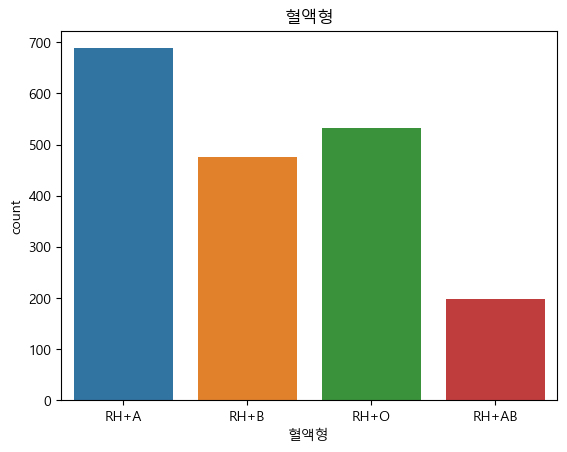

In [34]:
# 혈액형 chart

sns.countplot(data=df_ROS_forpatient, x='혈액형')
plt.title("혈액형")
plt.show()

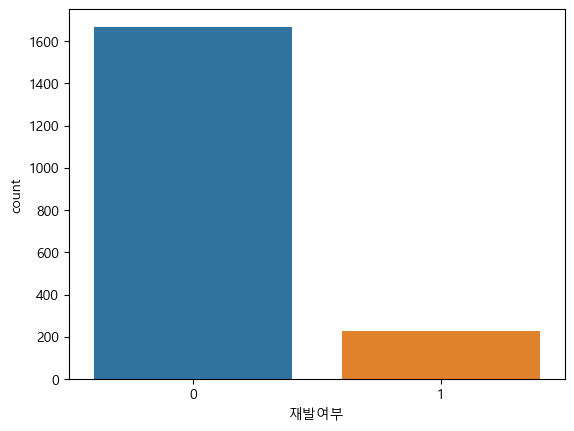

In [78]:
# 재발여부 chart

sns.countplot(data=df_ROS_forpatient, x='재발여부')
plt.show()

### 데이터셋 만들기 

In [40]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [41]:
df_ROS_forpatient.isnull().sum() # 결측치 확인

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [42]:
df_ROS_forpatient.dropna()

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0
3,1,174,0,74.2,0,40,주부,RH+O,0
4,1,183,0,80.7,0,42,특수전문직,RH+A,0
...,...,...,...,...,...,...,...,...,...
1889,2,157,0,64.0,0,59,무직,RH+A,0
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0


In [59]:
df_ROS_forpatient_dropna = df_ROS_forpatient.dropna() 
df_ROS_forpatient_dropna.info() # 결측치 삭제

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [52]:
df_ROS_forpatient_dropna['연령'].describe()

count    1479.000000
mean       39.980392
std        13.314364
min        15.000000
25%        30.000000
50%        39.000000
75%        47.000000
max        86.000000
Name: 연령, dtype: float64

In [ ]:
# 연령 이상치 제거 
- Q1 * 1.5, Q3 * 1.5 밖의 값

In [53]:
# Q1 , Q3 구하기 
Q1 = df_ROS_forpatient_dropna['연령'].describe()['25%']
Q3 = df_ROS_forpatient_dropna['연령'].describe()['75%']
IQR = Q3 -Q1

In [38]:
Q1, Q3, IQR

(32.0, 49.0, 17.0)

In [55]:
#filler
condition = (df_ROS_forpatient_dropna['연령'] < bound_up) # 긍정 조건 변환
condition

0       True
1       True
2       True
3       True
4       True
        ... 
1889    True
1890    True
1891    True
1892    True
1893    True
Name: 연령, Length: 1479, dtype: bool

In [54]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up

(4.5, 72.5)

In [56]:
df_ROS_condition = df_ROS_forpatient_dropna[condition]

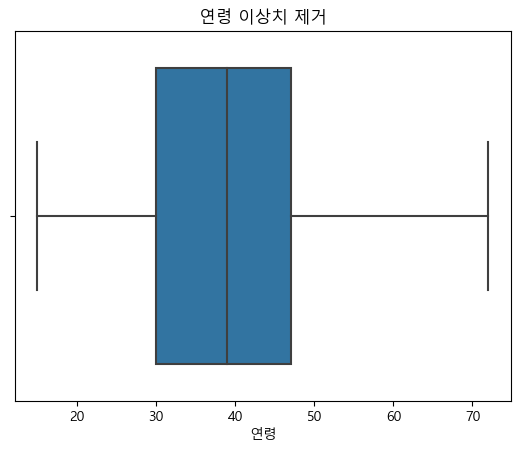

In [69]:
sns.boxplot(df_ROS_condition, x='연령')
plt.title('연령 이상치 제거')
plt.show()

In [63]:
# 신장 이상치 제거
df_ROS_forpatient_dropna['신장'].describe()

count    1479.000000
mean      168.158891
std         9.250669
min       140.000000
25%       161.000000
50%       169.000000
75%       175.000000
max       204.000000
Name: 신장, dtype: float64

In [65]:
Q1 = df_ROS_forpatient_dropna['신장'].describe()['25%']
Q3 = df_ROS_forpatient_dropna['신장'].describe()['75%']
IQR = Q3 - Q1

In [66]:
Q1, Q3, IQR

(161.0, 175.0, 14.0)

In [67]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(140.0, 196.0)

Text(0.5, 1.0, '신장 이상치 제거')

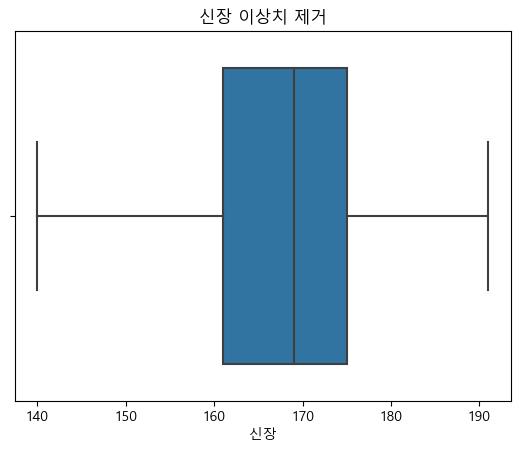

In [68]:
condition = (df_ROS_forpatient_dropna['신장']<= bound_up)
df_ROS_forpatient_dropna_length = df_ROS_forpatient_dropna[condition]
sns.boxplot(df_ROS_forpatient_dropna_length, x= '신장')
plt.title('신장 이상치 제거')

In [70]:
# 체중 이상치 제거
df_ROS_forpatient_dropna['체중'].describe()

count    1479.000000
mean       68.243070
std        11.426661
min        35.000000
25%        60.000000
50%        67.800000
75%        75.150000
max       136.100000
Name: 체중, dtype: float64

In [71]:
Q1 = df_ROS_forpatient_dropna['체중'].describe()['25%']
Q3 = df_ROS_forpatient_dropna['체중'].describe()['75%']
IQR = Q3 - Q1

In [72]:
Q1, Q3, IQR

(60.0, 75.15, 15.150000000000006)

In [73]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 * IQR
bound_up, bound_down

(97.87500000000001, 37.27499999999999)

Text(0.5, 1.0, '체중 이상치 제거')

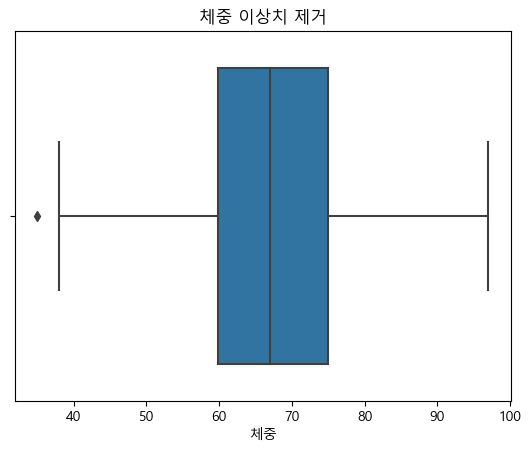

In [74]:
condition = (df_ROS_forpatient_dropna['체중']<= bound_up)
df_ROS_forpatient_dropna_length = df_ROS_forpatient_dropna[condition]
sns.boxplot(df_ROS_forpatient_dropna_length, x= '체중')
plt.title('체중 이상치 제거')